In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading data into dataframe
signal_training = pd.read_csv('signal_training.txt', sep='        ')
background_training = pd.read_csv('background_training.txt', sep='        ')

C:\Users\Schewski\AppData\Local\Temp\ipykernel_12408\1320645749.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  signal_training = pd.read_csv('signal_training.txt', sep='        ')
C:\Users\Schewski\AppData\Local\Temp\ipykernel_12408\1320645749.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  background_training = pd.read_csv('background_training.txt', sep='        ')


C:\Users\Schewski\AppData\Local\Temp\ipykernel_12408\1747618889.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


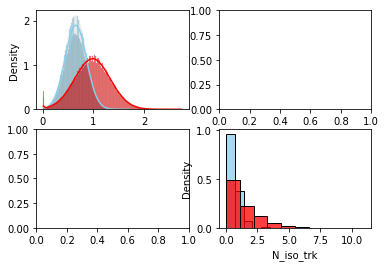

In [10]:
fig, axs = plt.subplots(ncols=2, nrows=2)

sns.histplot(signal_training['r_cal'], kde=True, stat="density", color="skyblue", label="Signal", ax=axs[0, 0])
sns.histplot(background_training['r_cal'], kde=True, stat="density", color="red", label="Background", ax=axs[0, 0])

'''
sns.histplot(signal_training['E_T_iso'], stat="density", color="skyblue", label="Signal", ax=axs[1])
sns.histplot(background_training['E_T_iso'], stat="density", color="red", label="Background", ax=axs[1])

sns.histplot(signal_training['S_t_flight'], kde=True, stat="density", color="skyblue", label="Signal", ax=axs[2])
sns.histplot(background_training['S_t_flight'], kde=True, stat="density", color="red", label="Background", ax=axs[2])'''

sns.histplot(signal_training['N_iso_trk'], stat="density", color="skyblue", label="Signal", ax=axs[1, 1], bins=10)
sns.histplot(background_training['N_iso_trk'], stat="density", color="red", label="Background", ax=axs[1, 1], bins=10)

fig.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

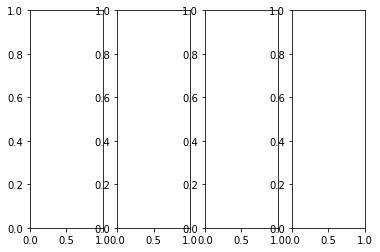

In [9]:
fig, axs = plt.subplots(ncols=4)
sns.histplot(signal_training['r_cal'], kde=True, stat="density", color="skyblue", label="Signal", ax=axs[0, 0])
sns.histplot(background_training['r_cal'], kde=True, stat="density", color="red", label="Background", ax=axs[0, 0])
fig.show()